# **Ejercicios de pair programming Módulo 2 Sprint 2**
## **Limpieza III**
### **Valores Extremos**

Hipótesis

La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

plt.rcParams["figure.figsize"] = (10,8)
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../datos/df_bank_clean2.csv', index_col = 0) 
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day_week
20612,44,management,married,basic 9y,no,yes,no,cellular,244,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,"aug, wed",aug,wed
15599,30,blue-collar,married,basic 4y,NaN,no,no,cellular,61,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,"jul, mon",jul,mon
2178,57,retired,single,high school,no,no,no,telephone,166,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"may, mon",may,mon


Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

Identifica visualmente los outliers

Identifica sobre el dataframe las filas que son outliers

Reemplaza los outliers por el estadístico más correcto.

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [3]:
df_numericas = df.select_dtypes(include = np.number).drop(["campaign"], axis = 1)
df_numericas.head()

,age,duration,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,56,261,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,999,0,1.1,93.994,-36.4,4.857,5191.0


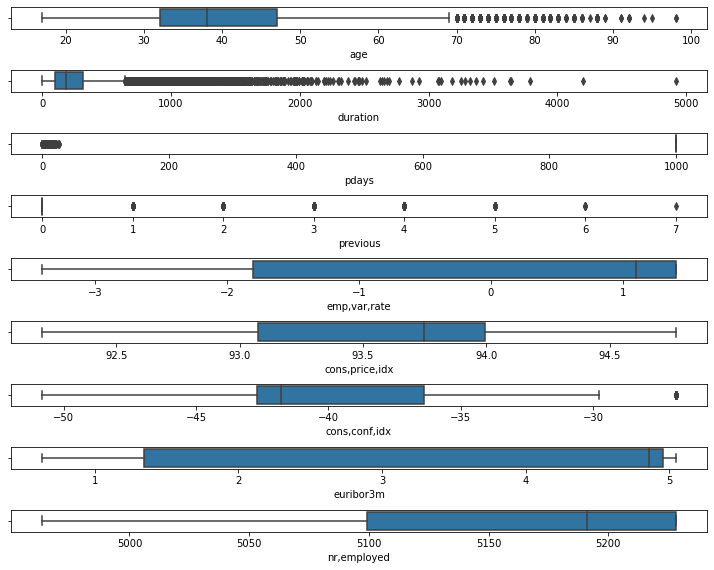

In [4]:
fig, ax = plt.subplots(len(df_numericas.columns),1)
    
for i, col in enumerate(df_numericas.columns):

    sns.boxplot(x =col, data = df_numericas, ax = ax[i]) 
    fig.tight_layout(pad=1)
plt.show() 

Tras ver los boxplot decidimos tratar los outliers de las dos primeras variables, "age" y "duration". Las otras dos con outliers son tan singulares que consideramos que requerían un tratamiento individualizado en subsets o una revisión de los datos para valorar si son representativos para un análisis.
Antes de proceder con la función que retorne los valores a reemplazar, vamos a realizar el proceso de manera individual para una columna. 
Después trataremos cada columna de forma individual también para valorar si queremos usar el mismo estadístico en los dos casos. 

In [5]:
#vamos a comenzar trabajando con una columna. En este caso "duration"
Q1 = np.nanpercentile(df_numericas["duration"], 25)
Q3 = np.nanpercentile(df_numericas["duration"], 75)

In [6]:
IRQ_duration = Q3-Q1
IRQ_duration

217.0

In [7]:
outlier_step = 1.5* IRQ_duration

In [8]:
outlier_top = Q3 + outlier_step
outlier_low = Q1 - outlier_step

In [9]:
outlier_top

644.5

In [10]:
outliers_data = df_numericas[(df_numericas["duration"] < outlier_low) | (df_numericas["duration"] > outlier_top)]
outliers_data

,age,duration,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
37,52,1666,999,0,1.1,93.994,-36.4,4.857,5191.0
57,45,787,999,0,1.1,93.994,-36.4,4.857,5191.0
61,51,812,999,0,1.1,93.994,-36.4,4.857,5191.0
75,41,1575,999,0,1.1,93.994,-36.4,4.857,5191.0
83,49,1042,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41147,25,712,19,1,-1.1,94.767,-50.8,1.040,4963.6
41153,67,655,5,5,-1.1,94.767,-50.8,1.039,4963.6
41160,33,843,999,0,-1.1,94.767,-50.8,1.035,4963.6
41164,54,1868,10,1,-1.1,94.767,-50.8,1.035,4963.6


In [11]:
x=list(outliers_data.index)
x

[37,
 57,
 61,
 75,
 83,
 88,
 111,
 131,
 164,
 169,
 182,
 195,
 198,
 199,
 243,
 249,
 276,
 286,
 296,
 329,
 346,
 388,
 389,
 395,
 413,
 431,
 446,
 462,
 467,
 469,
 504,
 539,
 556,
 575,
 590,
 614,
 659,
 681,
 689,
 719,
 723,
 773,
 806,
 820,
 832,
 840,
 844,
 856,
 876,
 913,
 937,
 943,
 967,
 981,
 987,
 1001,
 1005,
 1020,
 1053,
 1059,
 1077,
 1078,
 1113,
 1114,
 1124,
 1129,
 1166,
 1233,
 1256,
 1269,
 1283,
 1299,
 1305,
 1318,
 1348,
 1365,
 1367,
 1368,
 1396,
 1414,
 1442,
 1444,
 1470,
 1501,
 1505,
 1525,
 1538,
 1551,
 1568,
 1614,
 1624,
 1632,
 1636,
 1655,
 1662,
 1689,
 1691,
 1707,
 1720,
 1725,
 1763,
 1766,
 1791,
 1809,
 1810,
 1819,
 1839,
 1847,
 1852,
 1853,
 1869,
 1906,
 1938,
 1980,
 1984,
 1995,
 2000,
 2039,
 2064,
 2076,
 2082,
 2090,
 2097,
 2104,
 2105,
 2110,
 2126,
 2130,
 2132,
 2143,
 2260,
 2270,
 2275,
 2294,
 2313,
 2315,
 2330,
 2342,
 2367,
 2393,
 2400,
 2409,
 2417,
 2421,
 2431,
 2437,
 2444,
 2449,
 2454,
 2459,
 2465,
 247

In [12]:
df_numericas["duration"].median()

180.0

In [13]:
df_numericas["duration"].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [14]:
outliers_data["duration"].median()

854.0

In [15]:
outliers_data["duration"].describe()

count    2963.000000
mean      968.217010
std       367.294817
min       645.000000
25%       729.000000
50%       854.000000
75%      1086.000000
max      4918.000000
Name: duration, dtype: float64

In [16]:
def outliers_extract(columns_list, df):
    dicc_ind = {}
    for col in columns_list:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
    
        if outliers_data.shape[0] > 0:

            dicc_ind[col] = (list(outliers_data.index))
    
    return dicc_ind

In [17]:
#Esto es el diccionario con los datos de "age" que devuelve la función. 
outliers_age = outliers_extract(["age"], df_numericas)


In [20]:
df_numericas["age"].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [22]:
#Esto lo sacamos para tomar la decisión sobre el estadístico a utilizar. 
df_numericas["age"].median()

38.0

In [23]:
values_age = list(outliers_age.values())
values_age

[[27713,
  27757,
  27780,
  27800,
  27802,
  27805,
  27808,
  27810,
  27811,
  27812,
  27813,
  27814,
  27815,
  27816,
  27817,
  27818,
  27826,
  27837,
  27838,
  27844,
  27851,
  27875,
  27879,
  27902,
  27930,
  27950,
  27951,
  27963,
  28220,
  28221,
  28312,
  28456,
  28504,
  28530,
  28540,
  28586,
  28619,
  28732,
  28773,
  29225,
  29263,
  29498,
  29625,
  29668,
  29682,
  29973,
  29977,
  29981,
  29987,
  29990,
  30000,
  30004,
  30006,
  30072,
  30078,
  30079,
  30088,
  30103,
  30110,
  30133,
  30171,
  30214,
  30225,
  30227,
  30241,
  30334,
  30335,
  30390,
  30430,
  30460,
  30589,
  35833,
  35848,
  35856,
  35878,
  35973,
  36183,
  36285,
  36311,
  36383,
  36384,
  36816,
  36998,
  37136,
  37137,
  37170,
  37186,
  37190,
  37192,
  37193,
  37195,
  37206,
  37207,
  37213,
  37219,
  37227,
  37235,
  37237,
  37239,
  37257,
  37260,
  37316,
  37341,
  37355,
  37371,
  37403,
  37454,
  37455,
  37472,
  37479,
  37493,
 

In [24]:
#Esto no sería necesario en nuestro caso porque estabamos trabajando con solo una columna.
values_age = {indice for sublista in values_age for indice in sublista}

In [25]:
values_age

{27713,
 27757,
 27780,
 27800,
 27802,
 27805,
 27808,
 27810,
 27811,
 27812,
 27813,
 27814,
 27815,
 27816,
 27817,
 27818,
 27826,
 27837,
 27838,
 27844,
 27851,
 27875,
 27879,
 27902,
 27930,
 27950,
 27951,
 27963,
 28220,
 28221,
 28312,
 28456,
 28504,
 28530,
 28540,
 28586,
 28619,
 28732,
 28773,
 29225,
 29263,
 29498,
 29625,
 29668,
 29682,
 29973,
 29977,
 29981,
 29987,
 29990,
 30000,
 30004,
 30006,
 30072,
 30078,
 30079,
 30088,
 30103,
 30110,
 30133,
 30171,
 30214,
 30225,
 30227,
 30241,
 30334,
 30335,
 30390,
 30430,
 30460,
 30589,
 35833,
 35848,
 35856,
 35878,
 35973,
 36183,
 36285,
 36311,
 36383,
 36384,
 36816,
 36998,
 37136,
 37137,
 37170,
 37186,
 37190,
 37192,
 37193,
 37195,
 37206,
 37207,
 37213,
 37219,
 37227,
 37235,
 37237,
 37239,
 37257,
 37260,
 37316,
 37341,
 37355,
 37371,
 37403,
 37454,
 37455,
 37472,
 37479,
 37493,
 37505,
 37509,
 37512,
 37525,
 37532,
 37545,
 37568,
 37570,
 37586,
 37597,
 37601,
 37602,
 37604,
 37635,


In [26]:
df_sin_outliers = df.copy()

In [27]:
outliers_age

{'age': [27713,
  27757,
  27780,
  27800,
  27802,
  27805,
  27808,
  27810,
  27811,
  27812,
  27813,
  27814,
  27815,
  27816,
  27817,
  27818,
  27826,
  27837,
  27838,
  27844,
  27851,
  27875,
  27879,
  27902,
  27930,
  27950,
  27951,
  27963,
  28220,
  28221,
  28312,
  28456,
  28504,
  28530,
  28540,
  28586,
  28619,
  28732,
  28773,
  29225,
  29263,
  29498,
  29625,
  29668,
  29682,
  29973,
  29977,
  29981,
  29987,
  29990,
  30000,
  30004,
  30006,
  30072,
  30078,
  30079,
  30088,
  30103,
  30110,
  30133,
  30171,
  30214,
  30225,
  30227,
  30241,
  30334,
  30335,
  30390,
  30430,
  30460,
  30589,
  35833,
  35848,
  35856,
  35878,
  35973,
  36183,
  36285,
  36311,
  36383,
  36384,
  36816,
  36998,
  37136,
  37137,
  37170,
  37186,
  37190,
  37192,
  37193,
  37195,
  37206,
  37207,
  37213,
  37219,
  37227,
  37235,
  37237,
  37239,
  37257,
  37260,
  37316,
  37341,
  37355,
  37371,
  37403,
  37454,
  37455,
  37472,
  37479,
  3

In [28]:
# hemos sustituido los outliers de la columna age por la mediana de esta columna
for k, v in outliers_age.items():
    mediana = df[k].median()
    for i in v:
        df.loc[i,k] = mediana

In [29]:
df["age"].value_counts()

31    1947
38    1875
32    1845
33    1833
36    1779
35    1758
34    1745
30    1714
37    1475
29    1453
39    1430
41    1277
40    1161
42    1142
45    1102
43    1055
46    1030
44    1011
28    1001
48     979
47     927
50     875
27     850
49     839
52     779
51     754
53     733
56     704
26     698
54     684
55     647
57     646
25     598
58     576
59     463
24     462
60     283
23     226
22     137
21     102
61      73
20      65
62      62
66      57
64      57
63      55
65      44
19      42
69      34
68      33
18      28
67      26
17       5
Name: age, dtype: int64

In [30]:
for k, v in outliers_age.items():
    mediana = df[k].median()
    for i in v:
        df.loc[i,k] = mediana

In [33]:
df["age"].describe()

count    41176.000000
mean        39.581212
std          9.621591
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

In [34]:
df["duration"].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [35]:
df["duration"].mode()

0    85
1    90
Name: duration, dtype: int64

In [37]:
outliers_duration = outliers_extract(["duration"], df_numericas)

In [38]:
values_duration = list(outliers_duration.values())


In [39]:
#aplanamos la lista. Si tuviéramos más de una columna, este set nos elimina los índices duplicados. 
values_duration = {indice for sublista in values_duration for indice in sublista}

In [43]:
#cambiamos los datos en el df, los outliers por el dato que hemos decidido usar
for k, v in outliers_duration.items():
    mediana = df[k].median()
    for i in v:
        df.loc[i,k] = mediana


In [44]:
#Comprobamos el cambio en los estadísticos tras la sustitución de outliers por la mediana.
df["duration"].describe()

count    41176.000000
mean       201.596197
std        135.989810
min          0.000000
25%        102.000000
50%        180.000000
75%        265.000000
max        644.000000
Name: duration, dtype: float64